In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import requests
from datetime import date
import seaborn as sns
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.visuz import cluster


In [3]:
data = pd.read_excel('../data/xlsx/ord80p.xlsx', header = [0], index_col=None)
data = data.fillna(0)

data.head()

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD),ranva
0,2020-02-17,3.0,0,Madre de Dios,Tambopata,Tambopata,0.0,0.0,-12.597282,-69.179768,...,0,0.0,15.0,0.0,Bueno,Costos o reposición (directo),75.00,189.50,169607,0.0
1,2018-06-21,3.0,0,Lima,Lima,Santiago de Surco,0.0,0.0,-12.128921,-76.976432,...,0,0.0,5.0,0.0,Bueno,Comparación de mercado (directo),12.72,93.87,160437,0.0
2,2019-05-08,2.0,0,Lima,Lima,San Juan de Miraflores,0.0,0.0,-12.162320,-76.970215,...,0,0.0,16.0,0.0,Regular,Costos o reposición (directo),160.00,446.40,294567,0.0
3,2019-03-10,3.0,0,Lima,Lima,Surquillo,1.0,0.0,-12.112404,-77.014408,...,0,0.0,1.0,0.0,En construcción,Comparación de mercado (directo),3.94,85.56,124749,0.0
4,2021-01-17,1.0,0,Lambayeque,Lambayeque,Lambayeque,0.0,0.0,-6.699075,-79.901748,...,0,0.0,0.0,0.0,En proyecto,Costos o reposición (directo),60.00,27.58,23501,0.0


In [5]:
var = 'Provincia'

unique = np.unique(data[var], return_counts=True)

counts = [ (unique[0][i], unique[1][i]) for i in range(len(unique[0])) ]
counts = sorted(counts, key = lambda x : x[1])

top = 5

print(counts[-top:])
x = np.sum([v[1] for v in counts[-top:]])

x/data[var].count()

[('Chiclayo', 945), ('Prov. Const. del Callao', 975), ('Arequipa', 1359), ('Trujillo', 1571), ('Lima', 27426)]


0.7575814477513848

In [6]:
data[data['Provincia'] == 'Prov. Const. del Callao']

,Fecha entrega del Informe,Tipo de vía,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Área Terreno,Área Construcción,Valor comercial (USD),ranva
16,2019-07-14,0.0,0,Callao,Prov. Const. del Callao,Ventanilla,0.0,0.0,-11.844463,-77.154501,...,0,0.0,4.0,0.0,Bueno,Costos o reposición (directo),160.00,180.00,65155,0.0
22,2019-03-09,1.0,0,Callao,Prov. Const. del Callao,Callao,0.0,0.0,-12.013132,-77.101311,...,0,0.0,35.0,0.0,Bueno,Comparación de mercado (directo),35.94,68.67,57682,0.0
65,2019-01-09,0.0,0,Callao,Prov. Const. del Callao,Ventanilla,0.0,0.0,-11.890028,-77.126306,...,0,0.0,22.0,0.0,Bueno,Costos o reposición (directo),93.00,203.64,202052,0.0
141,2019-01-05,2.0,0,Callao,Prov. Const. del Callao,Callao,0.0,1.0,-12.055585,-77.092850,...,0,0.0,40.0,0.0,Bueno,Costos o reposición (directo),260.00,380.14,347065,0.0
238,2021-04-13,3.0,0,Callao,Prov. Const. del Callao,Bellavista,0.0,0.0,-12.062014,-77.093562,...,0,0.0,0.0,0.0,En proyecto,Comparación de mercado (directo),5.17,67.45,79591,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42389,2019-11-28,1.0,0,Callao,Prov. Const. del Callao,Ventanilla,0.0,0.0,-11.880858,-77.125195,...,0,0.0,10.0,0.0,Bueno,Costos o reposición (directo),150.00,515.00,260633,0.0
42427,2018-05-15,2.0,0,Callao,Prov. Const. del Callao,Bellavista,0.0,0.0,-12.053345,-77.087970,...,0,0.0,42.0,0.0,Regular,Costos o reposición (directo),204.55,222.53,270565,0.0
42514,2019-11-14,3.0,0,Callao,Prov. Const. del Callao,Callao,0.0,0.0,-12.056991,-77.129001,...,0,0.0,16.0,0.0,Bueno,Comparación de mercado (directo),119.74,380.58,361369,0.0
42596,2016-10-27,1.0,0,Callao,Prov. Const. del Callao,Ventanilla,0.0,0.0,-11.878125,-77.128104,...,0,0.0,28.0,0.0,0,Costos o reposición (directo),159.10,280.00,213896,0.0


In [210]:
all_headers = ['Fecha entrega del Informe', 
               'Tipo de vía', 
               'Piso', 
               'Departamento',
               'Provincia', 
               'Distrito', 
               'Número de estacionamiento',
               'Depósitos',
               'Latitud (Decimal)', 
               'Longitud (Decimal)', 
               'Categoría del bien',
               'Posición', 
               'Número de frentes', 
               'Edad', 
               'Elevador',
               'Estado de conservación', 
               'Método Representado', 
               'Área Terreno',
               'Área Construcción', 
               'Valor comercial (USD)']


In [211]:
non_numerical = ['Fecha entrega del Informe',
                 'Piso',
                 'Departamento',
                 'Provincia',
                 'Distrito',
                 'Categoría del bien',
                 'Posición',
                 'Estado de conservación',
                 'Método Representado']

numerical = ['Tipo de vía',
             'Número de estacionamiento',
             'Depósitos',
             'Latitud (Decimal)',
             'Longitud (Decimal)',
             'Número de frentes',
             'Edad',
             'Elevador',
             'Área Terreno',
             'Área Construcción',
             'Valor comercial (USD)']

categorical = ['Tipo de vía', 
               'Departamento',
               'Provincia', 
               'Distrito',  
               'Categoría del bien',
               'Posición',   
               'Método Representado']

continuous = ['Latitud (Decimal)', 
              'Longitud (Decimal)', 
              'Área Terreno',
              'Área Construcción', 
              'Valor comercial (USD)']

discrete = ['Número de estacionamiento',
            'Depósitos',
            'Número de frentes', 
            'Edad', 
            'Elevador']

numerical_non_categorical =  ['Número de estacionamiento',
                              'Depósitos',
                              'Latitud (Decimal)',
                              'Longitud (Decimal)',
                              'Número de frentes',
                              'Edad',
                              'Elevador',
                              'Área Terreno',
                              'Área Construcción',
                              'Valor comercial (USD)']

In [212]:
departamentos = ['Amazonas',
                 'Ancash',
                 'Apurimac', 
                 'Arequipa', 
                 'Ayacucho', 
                 'Cajamarca', 
                 'Callao', 
                 'Cusco',
                 'Huancavelica', 
                 'Huanuco', 
                 'Ica', 
                 'Junín', 
                 'La Libertad', 
                 'Lambayeque', 
                 'Lima', 
                 'Loreto', 
                 'Madre de Dios', 
                 'Moquegua', 
                 'Pasco', 
                 'Piura', 
                 'Puno', 
                 'San Martín', 
                 'Tacna', 
                 'Tumbes', 
                 'Ucayali']

In [ ]:
# A -> Heavy age (winged)
# B -> Square simetry
# C -> Abnormal

grupos = {'A' : ['Arequipa', 'Huancavelica', 'Junín', 'Lima', 'Monquegua', 'Piura', 'San Martín'],
          'B' : ['Ayacucho', 'Callao', 'Cusco', 'La Libertad', 'Lambayeque', 'Loreto', 'Pasco', 'Puno', 'Tacna', 'Tumbes', 'Ucayali'],
          'C' : ['Amazonas', 'Madre de Dios']}

In [282]:
#filtered = data[data['Departamento'] == 'Ucayali']

numerical_data = data[numerical_non_categorical].copy()

numerical_data['Latitud (Decimal)'] = (numerical_data['Latitud (Decimal)'] - numerical_data['Latitud (Decimal)'].min()) / (numerical_data['Latitud (Decimal)'].max() - numerical_data['Latitud (Decimal)'].min())
numerical_data['Longitud (Decimal)'] = (numerical_data['Longitud (Decimal)'] - numerical_data['Longitud (Decimal)'].min()) / (numerical_data['Longitud (Decimal)'].max() - numerical_data['Longitud (Decimal)'].min())

#numerical_data['Número de estacionamiento'].replace(np.nan, 0.0, inplace=True)
#numerical_data['Depósitos'].replace(np.nan, 0.0, inplace=True)
#numerical_data['Elevador'].replace(np.nan, 0.0, inplace=True)

numerical_data = numerical_data.applymap(lambda x : float(x.replace(',','')) if isinstance(x,str) else x)
numerical_data_log = numerical_data.applymap(lambda x : np.log10(x + 0.00001))
numerical_data_log = numerical_data_log.fillna(0)
#numerical_data_log



In [283]:
numerical_data_log.head()

,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Número de frentes,Edad,Elevador,Área Terreno,Área Construcción,Valor comercial (USD)
0,0.000000,0.0,-3.711482,-0.000026,0.0,1.176092,0.0,1.875061,2.277609,5.229444
1,-5.000000,-5.0,-3.708500,-0.000030,0.0,0.698971,0.0,1.104487,1.972527,5.205305
2,-5.000000,-5.0,-3.708712,-0.000030,0.0,1.204120,0.0,2.204120,2.649724,5.469184
3,0.000004,-5.0,-3.708395,-0.000030,0.0,0.000004,0.0,0.595497,1.932271,5.096037
4,-5.000000,-5.0,-3.675339,-0.000031,0.0,-5.000000,0.0,1.778151,1.440594,4.371086


In [280]:
numerical_data.describe()

,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Número de frentes,Edad,Elevador,Área Terreno,Área Construcción,Valor comercial (USD)
count,36251.000000,36198.000000,41930.000000,41881.000000,78.000000,38793.000000,92.000000,4.168000e+04,39033.000000,4.260400e+04
mean,0.449505,0.210702,0.000212,0.999898,1.307692,15.945119,1.195652,1.099188e+04,313.481930,3.896450e+05
std,3.710281,2.189480,0.004883,0.004886,2.440501,35.522218,0.828598,5.219268e+05,999.288163,9.853284e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.100000e+01
25%,0.000000,0.000000,0.000186,0.999922,1.000000,2.000000,0.000000,1.712000e+01,80.000000,1.012340e+05
50%,0.000000,0.000000,0.000186,0.999922,1.000000,8.000000,1.000000,7.036500e+01,126.070000,1.749055e+05
75%,1.000000,0.000000,0.000186,0.999922,1.000000,22.000000,2.000000,2.412000e+02,260.060000,3.371580e+05
max,329.000000,200.000000,1.000000,1.000000,22.000000,2018.000000,2.000000,1.030003e+08,44827.000000,3.574242e+07


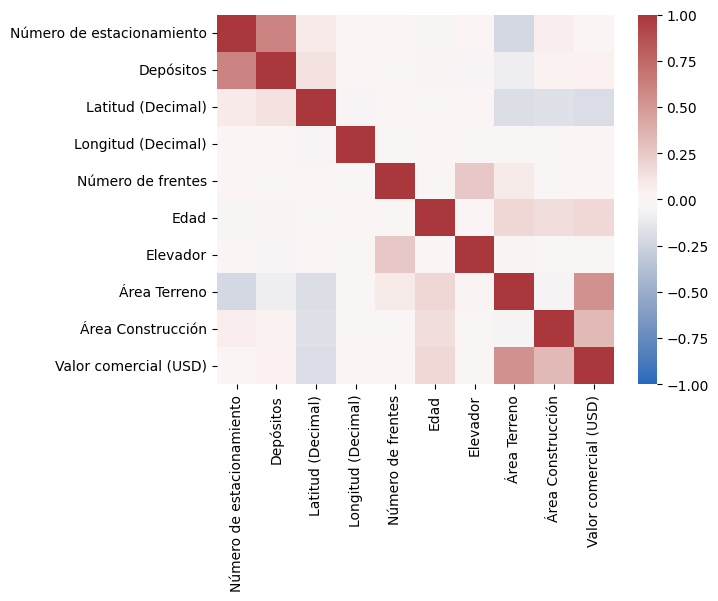

In [284]:
sns.heatmap(numerical_data_log.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.show()

In [290]:


#numerical_data_log = numerical_data_log.dropna()
#df_st =  StandardScaler().fit_transform(numerical_data_log)  
pca_out = PCA().fit(numerical_data_log)
pca_scores = PCA().fit_transform(numerical_data_log)
loadings = pca_out.components_

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=numerical_data_log.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=numerical_data_log.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
               var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [ ]:
numerical_data_log.insert(0,'Departamento', data['Departamento'].to_numpy())

sns.pairplot(numerical_data_log, hue='Departamento')
plt.show()

In [ ]:
linkage_data = linkage(numerical_data_log.corr().applymap(lambda x: np.abs(x)), method='single', metric='euclidean')
dendrogram(linkage_data, labels=numerical_data.columns, leaf_rotation=90, count_sort=True)

plt.show()


In [56]:
geo_data = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [57]:
geo_data.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
